# SUAVISADO

### FILTRO PROMEDIO

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en escala de grises
image = cv2.imread('STAR.jpg', cv2.IMREAD_GRAYSCALE)
#image = cv2.imread('STAR.jpg')


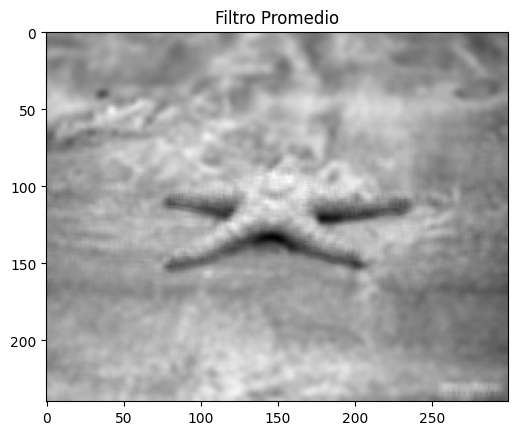

In [26]:
# Aplicar filtro promedio (kernel de 5x5)
average_blur = cv2.blur(image, (5, 5))

# Mostrar resultado
plt.imshow(average_blur, cmap='gray')
plt.title("Filtro Promedio")
plt.show()


### FILTRO GAUSSIANO

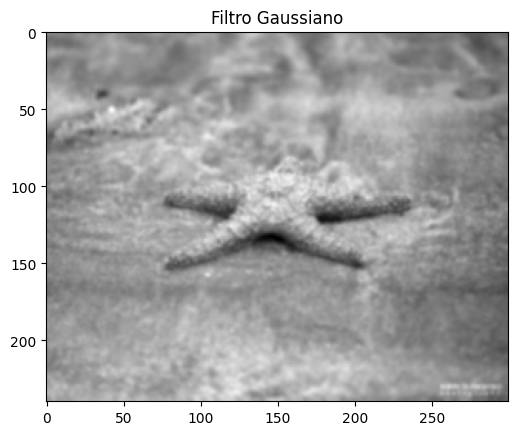

In [27]:
# Aplicar filtro gaussiano (kernel 5x5, sigma=1)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

# Mostrar resultado
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Filtro Gaussiano")
plt.show()


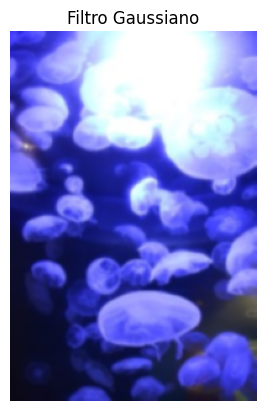

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen en color
image = cv2.imread('MEDUSA.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para matplotlib

# Aplicar filtro gaussiano (kernel 5x5, sigma=1)
gaussian_blur = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

# Mostrar resultado
plt.imshow(gaussian_blur)
plt.title("Filtro Gaussiano")
plt.axis('off')
plt.show()


#### FILTRO BILATERAL

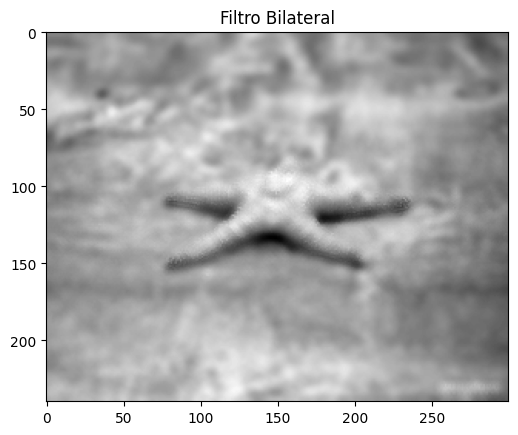

In [28]:
# Aplicar filtro bilateral (diámetro=9, sigmaColor=75, sigmaSpace=75)
bilateral_blur = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Mostrar resultado
plt.imshow(bilateral_blur, cmap='gray')
plt.title("Filtro Bilateral")
plt.show()


### FILTRO DE MEDIANA

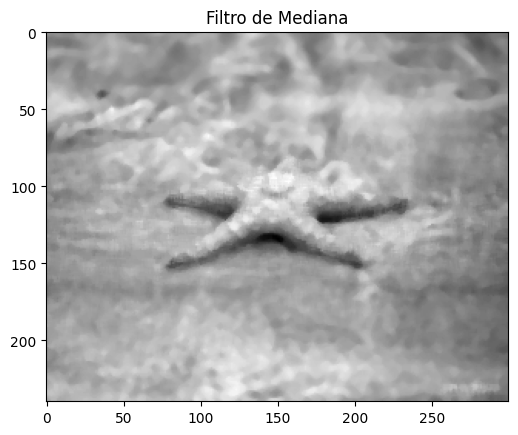

In [29]:
# Aplicar filtro de mediana (kernel de 5x5)
median_blur = cv2.medianBlur(image, ksize=5)

# Mostrar resultado
plt.imshow(median_blur, cmap='gray')
plt.title("Filtro de Mediana")
plt.show()


### FILTRO ADAPTATIVO

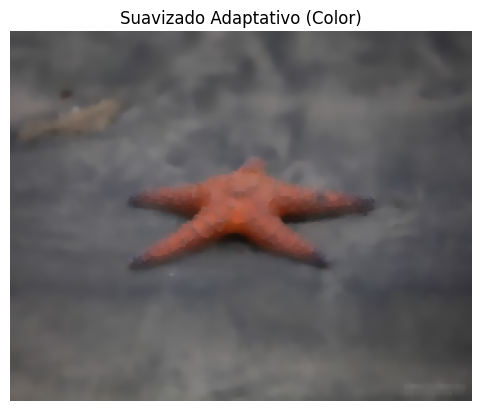

In [39]:
# Leer la imagen en color
image_color = cv2.imread('STAR.jpg')
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

# Aplicar denoise_tv_chambolle a cada canal
adaptive_blur_color = [denoise_tv_chambolle(image_color[:, :, i], weight=0.1) for i in range(3)]

# Reconstruir la imagen combinando los canales
adaptive_blur_color = cv2.merge(adaptive_blur_color)

# Mostrar resultado
plt.imshow(adaptive_blur_color)
plt.title("Suavizado Adaptativo (Color)")
plt.axis('off')
plt.show()


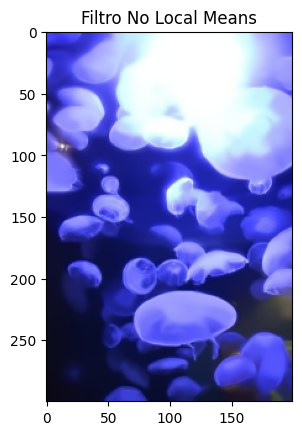

In [42]:
# Aplicar filtro No Local Means
nlm_blur = cv2.fastNlMeansDenoising(image, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Mostrar resultado
plt.imshow(nlm_blur, cmap='gray')
plt.title("Filtro No Local Means")
plt.show()


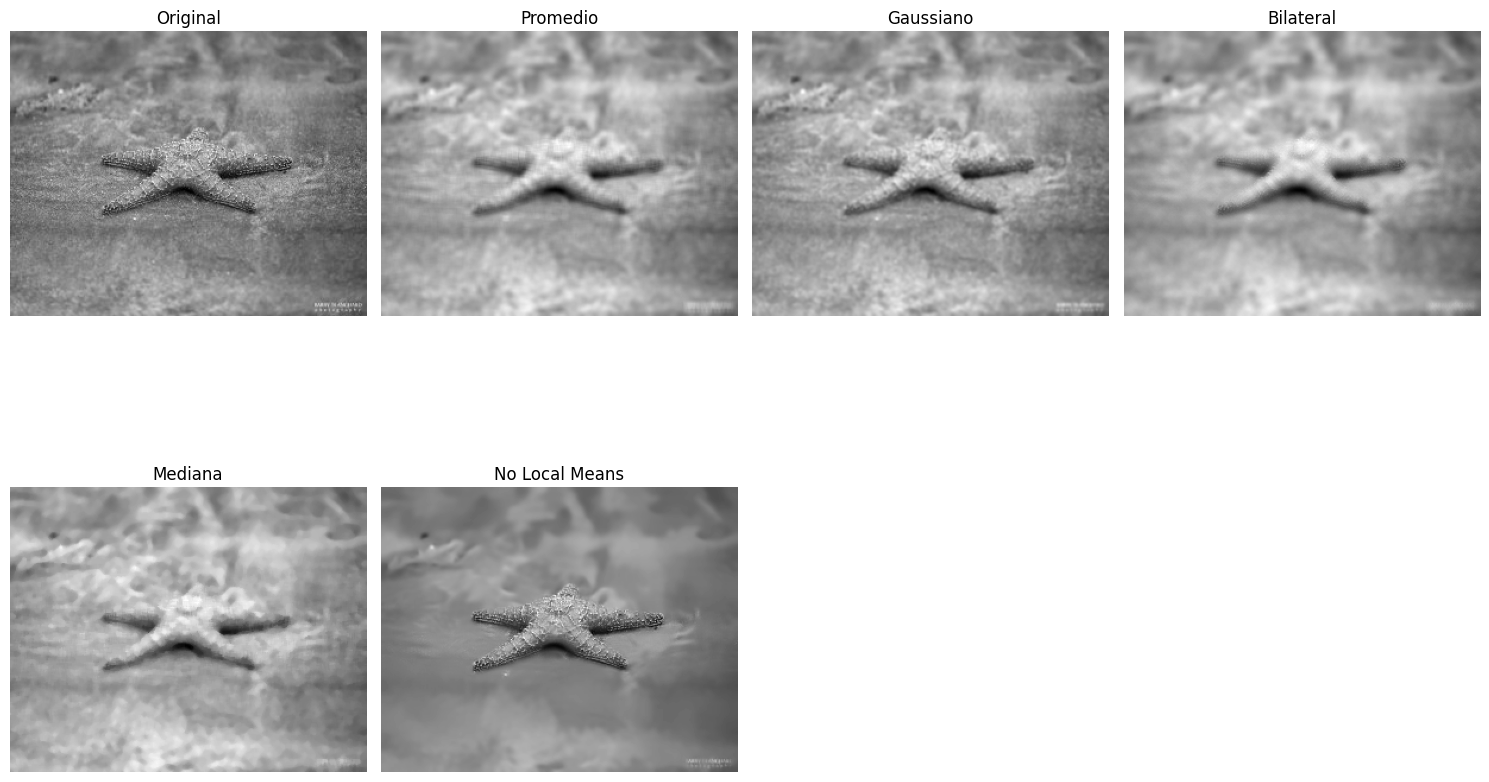

In [32]:
filters = {
    "Original": image,
    "Promedio": average_blur,
    "Gaussiano": gaussian_blur,
    "Bilateral": bilateral_blur,
    "Mediana": median_blur,
    "No Local Means": nlm_blur,
}

plt.figure(figsize=(15, 10))
for i, (name, img) in enumerate(filters.items()):
    plt.subplot(2, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()


### A COLOR

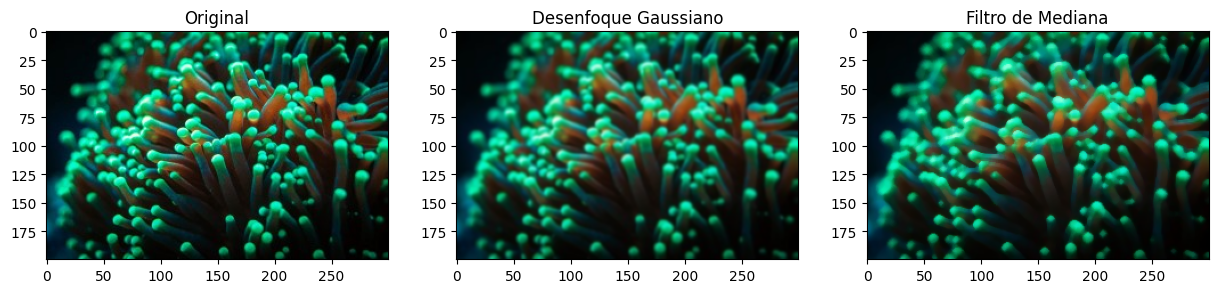

In [39]:
# Aplicar desenfoque gaussiano
blurred = cv2.GaussianBlur(img, (5,5), 0)

# Aplicar filtro de mediana
median = cv2.medianBlur(img, 5)

# Mostrar imágenes
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(img), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(blurred), plt.title("Desenfoque Gaussiano")
plt.subplot(1,3,3), plt.imshow(median), plt.title("Filtro de Mediana")
plt.show()


# ELIMINACIÓN DE RUIDO

In [7]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

In [6]:


def median_filter(image, kernel_size=3):
    """
    Filtro de Mediana: Excelente para eliminar ruido 'sal y pimienta' mientras preserva bordes.
    Útil en imágenes médicas y procesamiento de fotografías digitales.
    
    Args:
        image: Imagen de entrada en formato numpy array
        kernel_size: Tamaño de la ventana del filtro (impar)
    """
    return cv2.medianBlur(image, kernel_size)

def order_statistic_filters(image, kernel_size=3):
    """
    Filtros de Orden Estadístico: Útiles para diferentes tipos de mejora de imagen
    y eliminación de ruido específico.
    - Máximo: Destaca puntos brillantes, útil en detección de partículas
    - Mínimo: Destaca puntos oscuros, útil en detección de defectos
    - Rango Medio: Balance entre máximo y mínimo, reduce ruido extremo
    """
    # Filtro máximo
    max_filtered = ndimage.maximum_filter(image, size=kernel_size)
    
    # Filtro mínimo
    min_filtered = ndimage.minimum_filter(image, size=kernel_size)
    
    # Filtro de rango medio
    midrange_filtered = (max_filtered.astype(float) + min_filtered.astype(float)) / 2
    
    return max_filtered, min_filtered, midrange_filtered

def mode_filter(image, kernel_size=3):
    """
    Filtro de Moda: Útil para imágenes con valores discretos o cuantizados.
    Aplicaciones en procesamiento de imágenes segmentadas o etiquetadas.
    """
    def calculate_mode(values):
        if len(values) == 0:
            return 0
        counts = np.bincount(values)
        return np.argmax(counts)
    
    padding = kernel_size // 2
    result = np.zeros_like(image)
    padded = np.pad(image, padding, mode='edge')
    
    for i in range(padding, padded.shape[0] - padding):
        for j in range(padding, padded.shape[1] - padding):
            window = padded[i-padding:i+padding+1, j-padding:j+padding+1]
            result[i-padding, j-padding] = calculate_mode(window.flatten())
    
    return result

def adaptive_filter(image, kernel_size=3, C=2):
    """
    Filtro Adaptativo: Ajusta el filtrado basado en la varianza local.
    Útil en imágenes con ruido variable en diferentes regiones.
    Preserva detalles en áreas de alta varianza mientras suaviza áreas uniformes.
    """
    padding = kernel_size // 2
    result = np.zeros_like(image, dtype=float)
    padded = np.pad(image.astype(float), padding, mode='edge')
    
    for i in range(padding, padded.shape[0] - padding):
        for j in range(padding, padded.shape[1] - padding):
            window = padded[i-padding:i+padding+1, j-padding:j+padding+1]
            local_mean = np.mean(window)
            local_var = np.var(window)
            noise_var = np.mean([np.var(row) for row in window])
            
            if noise_var == 0:
                result[i-padding, j-padding] = local_mean
            else:
                k = local_var / (local_var + C * noise_var)
                result[i-padding, j-padding] = local_mean + k * (padded[i,j] - local_mean)
    
    return np.clip(result, 0, 255).astype(np.uint8)

def bilateral_filter(image, kernel_size=3, sigma_space=75, sigma_intensity=75):
    """
    Filtro Bilateral: Combina información espacial y de intensidad.
    Excelente para reducción de ruido preservando bordes.
    Aplicaciones en fotografía digital, procesamiento de imágenes médicas y HDR.
    """
    return cv2.bilateralFilter(image, kernel_size, sigma_intensity, sigma_space)

def conservative_filter(image, kernel_size=3):
    """
    Filtro Conservativo: Preserva bordes reemplazando el pixel central
    solo si es un outlier en la ventana local.
    Útil en preservación de detalles finos y eliminación de ruido impulsivo.
    """
    padding = kernel_size // 2
    result = np.zeros_like(image)
    padded = np.pad(image, padding, mode='edge')
    
    for i in range(padding, padded.shape[0] - padding):
        for j in range(padding, padded.shape[1] - padding):
            window = padded[i-padding:i+padding+1, j-padding:j+padding+1]
            center = padded[i,j]
            window_min = np.min(window)
            window_max = np.max(window)
            
            if center < window_min:
                result[i-padding, j-padding] = window_min
            elif center > window_max:
                result[i-padding, j-padding] = window_max
            else:
                result[i-padding, j-padding] = center
                
    return result

In [5]:
def visualize_results(results, figsize=(15, 10)):
    """
    Visualiza los resultados de todos los filtros aplicados
    Muestra la imagen original y los resultados de cada filtro
    """
    n_filters = len(results)
    rows = (n_filters + 2) // 3  # Calculamos número de filas necesarias
    
    plt.figure(figsize=figsize)
    
    for idx, (filter_name, image) in enumerate(results.items()):
        plt.subplot(rows, 3, idx + 1)
        plt.imshow(image, cmap='gray')
        plt.title(filter_name.capitalize())
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def add_noise(image, noise_type="s&p"):
    """
    Añade ruido a la imagen para demostrar la efectividad de los filtros
    
    Args:
        image: Imagen de entrada
        noise_type: Tipo de ruido ('s&p' para sal y pimienta, 'gaussian' para ruido gaussiano)
    """
    noisy_image = np.copy(image)
    
    if noise_type == "s&p":
        # Añadir ruido sal y pimienta
        prob = 0.05
        rnd = np.random.rand(image.shape[0], image.shape[1])
        noisy_image[rnd < prob/2] = 0    # Pimienta
        noisy_image[rnd > 1 - prob/2] = 255  # Sal
    
    elif noise_type == "gaussian":
        # Añadir ruido gaussiano
        mean = 0
        sigma = 25
        noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
    
    return noisy_image

# Ejemplo de uso completo
def demo_filters(image_path):
    """
    Demostración completa de los filtros con visualización
    """
    # Leer imagen
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Añadir ruido para demostración
    noisy_image = add_noise(image, "s&p")
    
    # Aplicar filtros
    results = {
        'original': image,
        'noisy': noisy_image,
        'median': median_filter(noisy_image),
        'maximum': order_statistic_filters(noisy_image)[0],
        'minimum': order_statistic_filters(noisy_image)[1],
        'midrange': order_statistic_filters(noisy_image)[2].astype(np.uint8),
        'mode': mode_filter(noisy_image),
        'adaptive': adaptive_filter(noisy_image),
        'bilateral': bilateral_filter(noisy_image),
        'conservative': conservative_filter(noisy_image)
    }
    
    # Visualizar resultados
    visualize_results(results)
    
    return results

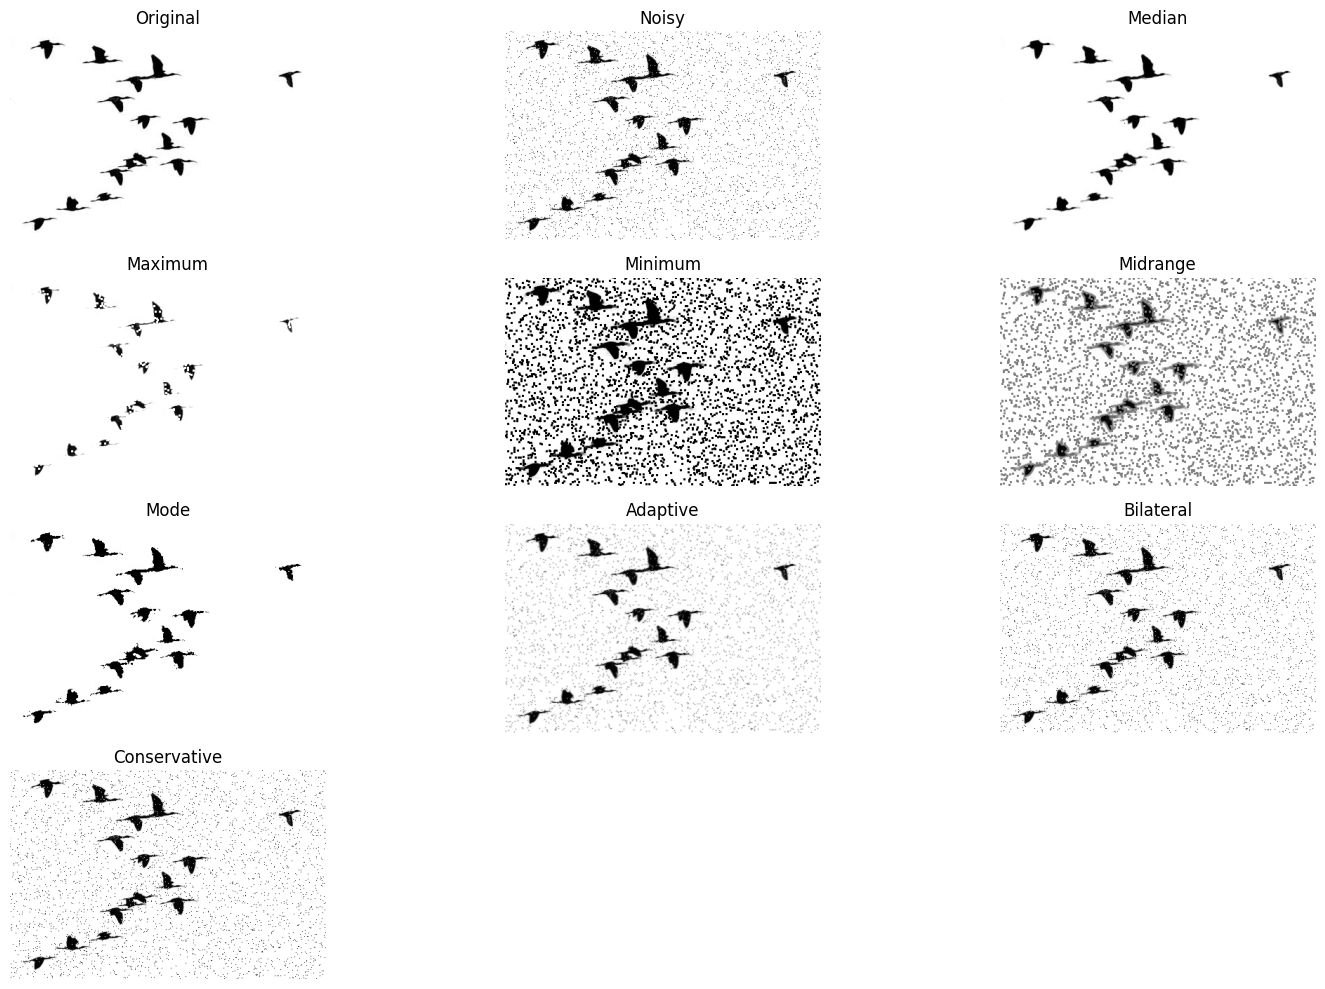

{'original': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'noisy': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ...,   0, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255,   0, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'median': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 'maximum': array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 

In [9]:
demo_filters('AVES.jpg')

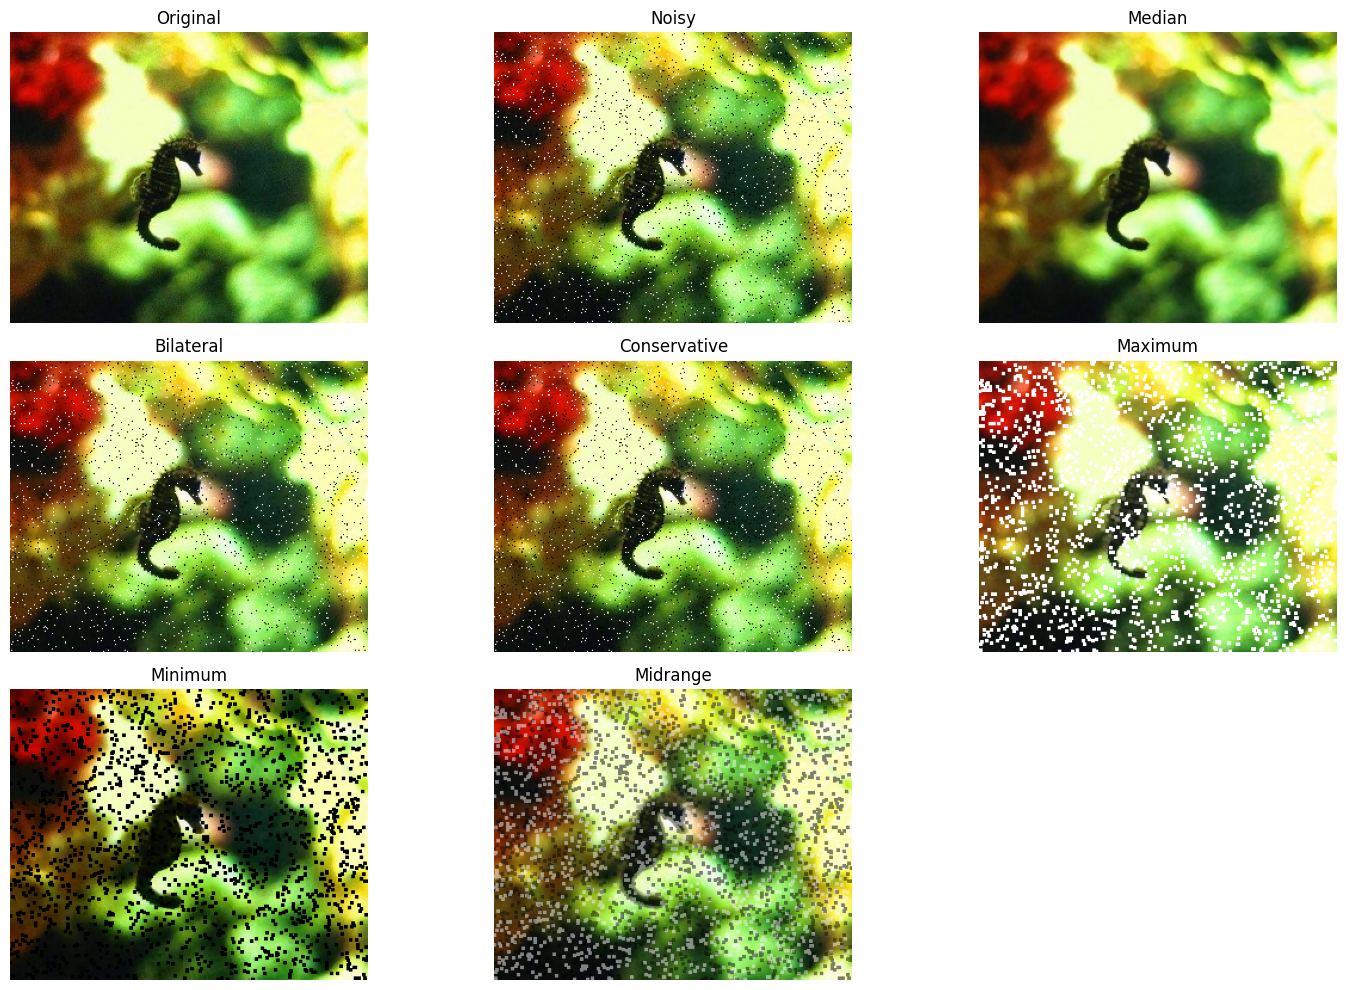

In [12]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

def apply_filter_to_color_image(image, filter_function, **kwargs):
    """
    Aplica un filtro a cada canal de color de la imagen
    
    Args:
        image: Imagen BGR o RGB
        filter_function: Función del filtro a aplicar
        kwargs: Argumentos adicionales para el filtro
    """
    # Separar los canales
    channels = cv2.split(image)
    
    # Aplicar el filtro a cada canal
    filtered_channels = []
    for channel in channels:
        filtered_channel = filter_function(channel, **kwargs)
        filtered_channels.append(filtered_channel)
    
    # Combinar los canales
    return cv2.merge(filtered_channels)

def median_filter_color(image, kernel_size=3):
    """Filtro de Mediana para imagen a color"""
    return cv2.medianBlur(image, kernel_size)

def order_statistic_filters_color(image, kernel_size=3):
    """Filtros de Orden Estadístico para imagen a color"""
    max_filtered = apply_filter_to_color_image(image, 
                                             ndimage.maximum_filter, 
                                             size=kernel_size)
    min_filtered = apply_filter_to_color_image(image, 
                                             ndimage.minimum_filter, 
                                             size=kernel_size)
    midrange_filtered = (max_filtered.astype(float) + min_filtered.astype(float)) / 2
    return max_filtered, min_filtered, midrange_filtered.astype(np.uint8)

def bilateral_filter_color(image, kernel_size=3, sigma_space=75, sigma_intensity=75):
    """Filtro Bilateral para imagen a color"""
    return cv2.bilateralFilter(image, kernel_size, sigma_intensity, sigma_space)

def conservative_filter_color(image, kernel_size=3):
    """
    Filtro Conservativo para imagen a color
    Preserva bordes y detalles mientras elimina ruido
    """
    padding = kernel_size // 2
    result = np.zeros_like(image)
    padded = np.pad(image, ((padding, padding), (padding, padding), (0, 0)), mode='edge')
    
    for i in range(padding, padded.shape[0] - padding):
        for j in range(padding, padded.shape[1] - padding):
            for c in range(3):  # Para cada canal de color
                window = padded[i-padding:i+padding+1, j-padding:j+padding+1, c]
                center = padded[i,j,c]
                window_min = np.min(window)
                window_max = np.max(window)
                
                if center < window_min:
                    result[i-padding, j-padding, c] = window_min
                elif center > window_max:
                    result[i-padding, j-padding, c] = window_max
                else:
                    result[i-padding, j-padding, c] = center
                    
    return result

def add_noise_color(image, noise_type="s&p"):
    """
    Añade ruido a la imagen a color
    """
    noisy_image = np.copy(image)
    
    if noise_type == "s&p":
        # Añadir ruido sal y pimienta
        prob = 0.05
        rnd = np.random.rand(image.shape[0], image.shape[1])
        
        # Aplicar ruido a todos los canales
        for i in range(3):
            channel = noisy_image[:,:,i]
            channel[rnd < prob/2] = 0      # Pimienta
            channel[rnd > 1 - prob/2] = 255  # Sal
            noisy_image[:,:,i] = channel
            
    elif noise_type == "gaussian":
        # Añadir ruido gaussiano
        mean = 0
        sigma = 25
        noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
    
    return noisy_image

def visualize_color_results(results, figsize=(15, 10)):
    """
    Visualiza los resultados de los filtros en imagen a color
    """
    n_filters = len(results)
    rows = (n_filters + 2) // 3
    
    plt.figure(figsize=figsize)
    
    for idx, (filter_name, image) in enumerate(results.items()):
        plt.subplot(rows, 3, idx + 1)
        # Convertir de BGR a RGB para matplotlib
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        plt.title(filter_name.capitalize())
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def demo_color_filters(image_path):
    """
    Demostración completa de los filtros en imagen a color
    """
    # Leer imagen a color
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("No se pudo cargar la imagen")
    
    # Añadir ruido
    noisy_image = add_noise_color(image)
    
    # Aplicar filtros
    results = {
        'original': image,
        'noisy': noisy_image,
        'median': median_filter_color(noisy_image),
        'bilateral': bilateral_filter_color(noisy_image),
        'conservative': conservative_filter_color(noisy_image)
    }
    
    # Añadir resultados de filtros de orden estadístico
    max_f, min_f, midrange = order_statistic_filters_color(noisy_image)
    results.update({
        'maximum': max_f,
        'minimum': min_f,
        'midrange': midrange
    })
    
    # Visualizar resultados
    visualize_color_results(results)
    
    return results

# Ejemplo de uso:
results = demo_color_filters('SEAH.jpg')

# REALCE DE BORDES

### SOBREL

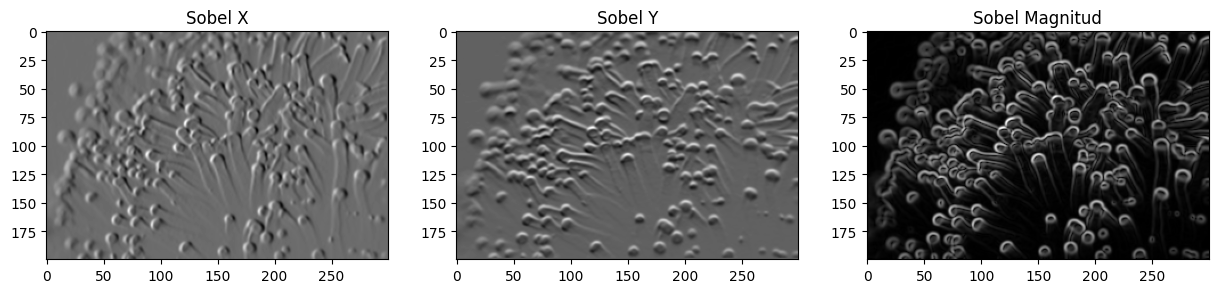

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('CORAL.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro Sobel
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)  # Derivada en X
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)  # Derivada en Y
sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Magnitud del gradiente

# Mostrar resultados
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel X")
plt.subplot(1,3,2), plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel Y")
plt.subplot(1,3,3), plt.imshow(sobel_combined, cmap='gray'), plt.title("Sobel Magnitud")
plt.show()


### PREWITT

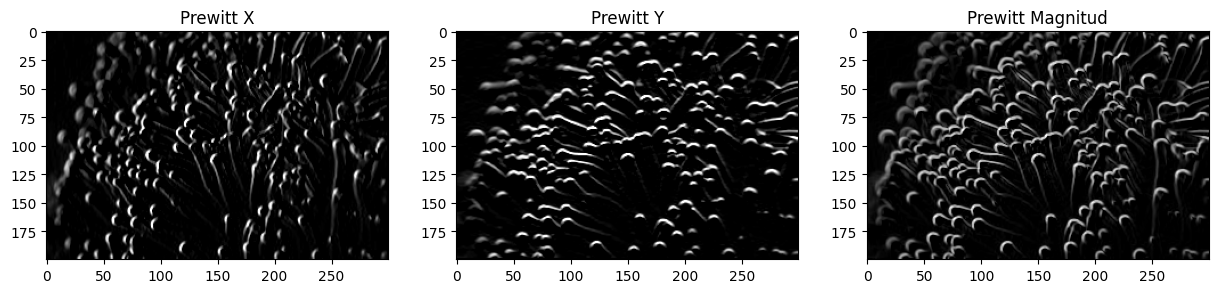

In [24]:
# Aplicar filtro Prewitt
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Horizontal
kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # Vertical

prewitt_x = cv2.filter2D(img, -10, kernel_prewitt_x)
prewitt_y = cv2.filter2D(img, -10, kernel_prewitt_y)
prewitt_combined = cv2.magnitude(prewitt_x.astype(np.float32), prewitt_y.astype(np.float32))

# Mostrar resultados
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(prewitt_x, cmap='gray'), plt.title("Prewitt X")
plt.subplot(1,3,2), plt.imshow(prewitt_y, cmap='gray'), plt.title("Prewitt Y")
plt.subplot(1,3,3), plt.imshow(prewitt_combined, cmap='gray'), plt.title("Prewitt Magnitud")
plt.show()


### LAPALCIANO

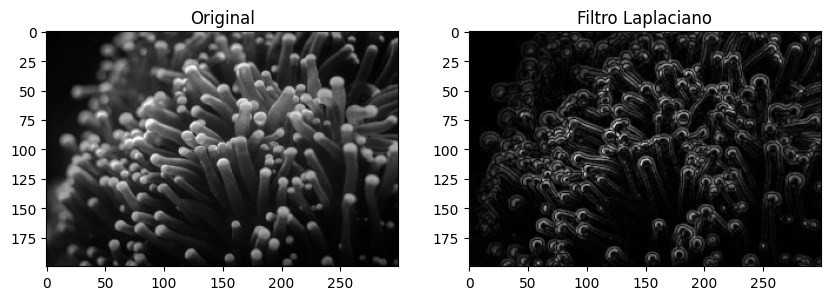

In [19]:
# Aplicar filtro Laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=5)

# Mostrar resultados
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(np.abs(laplacian), cmap='gray'), plt.title("Filtro Laplaciano")
plt.show()


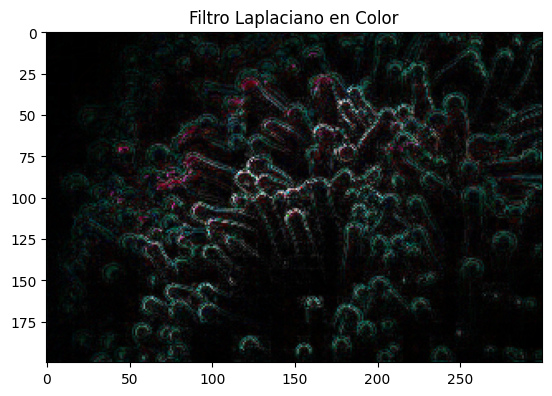

In [40]:
# Aplicar filtro Laplaciano en cada canal
laplacian_r = cv2.Laplacian(r, cv2.CV_64F)
laplacian_g = cv2.Laplacian(g, cv2.CV_64F)
laplacian_b = cv2.Laplacian(b, cv2.CV_64F)

# Combinar canales filtrados
laplacian_color = cv2.merge([laplacian_r, laplacian_g, laplacian_b])

# Mostrar imagen filtrada
plt.imshow(np.abs(laplacian_color).astype(np.uint8))
plt.title("Filtro Laplaciano en Color")
plt.show()


### PASO ALTO

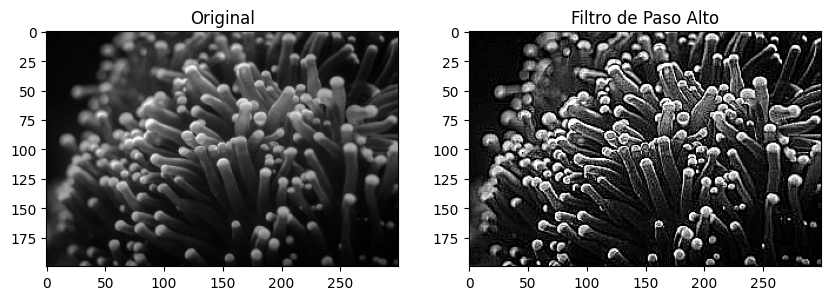

In [22]:
# Kernel de paso alto para realzar bordes
kernel_sharpen = np.array([[-1, -1, -1], 
                           [-1,  9, -1], 
                           [-1, -1, -1]])

# Aplicar convolución
sharpened = cv2.filter2D(img, -2, kernel_sharpen)

# Mostrar resultados
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(sharpened, cmap='gray'), plt.title("Filtro de Paso Alto")
plt.show()


### CANNY

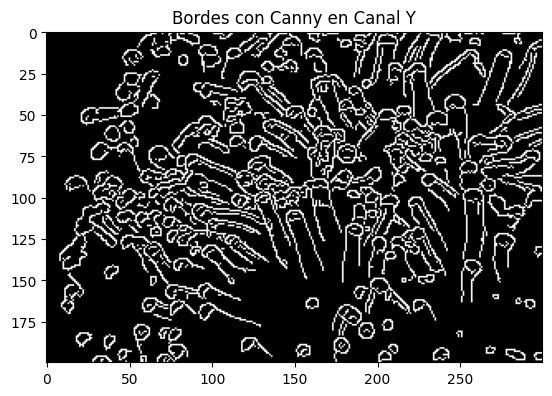

In [41]:
# Convertir imagen a YCrCb
ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(ycrcb)

# Aplicar Canny en el canal Y
edges = cv2.Canny(y, 50, 150)

# Mostrar imagen filtrada
plt.imshow(edges, cmap='gray')
plt.title("Bordes con Canny en Canal Y")
plt.show()


### A COLOR

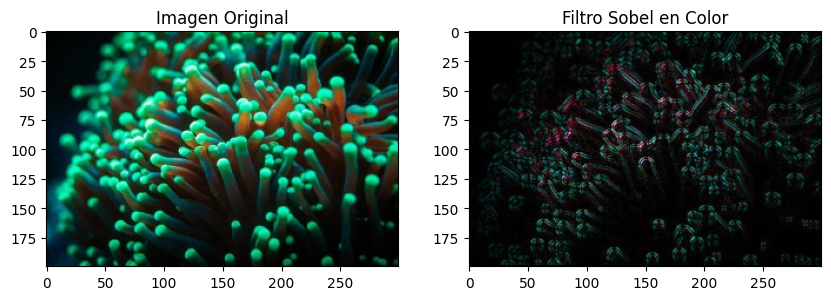

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en color
img = cv2.imread('CORAL.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB para matplotlib

# Separar canales de color (R, G, B)
r, g, b = cv2.split(img)

# Aplicar Sobel en cada canal
sobel_r = cv2.Sobel(r, cv2.CV_64F, 1, 1, ksize=3)
sobel_g = cv2.Sobel(g, cv2.CV_64F, 1, 1, ksize=3)
sobel_b = cv2.Sobel(b, cv2.CV_64F, 1, 1, ksize=3)

# Combinar los bordes detectados en los 3 canales
sobel_color = cv2.merge([sobel_r, sobel_g, sobel_b])

# Mostrar imagen original y el resultado
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Imagen Original")
plt.subplot(1,2,2), plt.imshow(np.abs(sobel_color).astype(np.uint8)), plt.title("Filtro Sobel en Color")
plt.show()


# UNION DE FILTROS LINEALE & NO LINEALES PARATAREAS AVANZADAS

### DETECCIÓNDE TEXTURAS

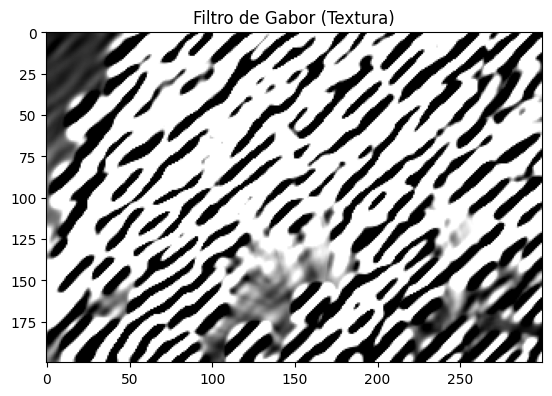

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('CORAL.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar un filtro de Gabor para detección de texturas
kernel_gabor = cv2.getGaborKernel((21, 21), 5.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)
texture = cv2.filter2D(img, -1, kernel_gabor)

plt.imshow(texture, cmap='gray'), plt.title("Filtro de Gabor (Textura)")
plt.show()


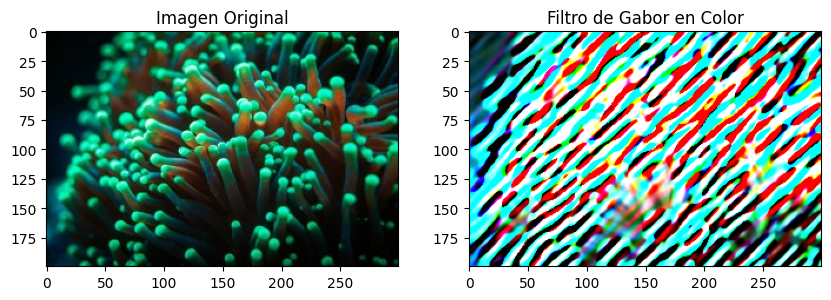

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en color
img = cv2.imread('CORAL.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB

# Separar los canales de color
r, g, b = cv2.split(img)

# Crear un kernel de Gabor
ksize = 21  # Tamaño del kernel
sigma = 5.0  # Desviación estándar de la gaussiana
theta = np.pi / 4  # Orientación del filtro
lambd = 10.0  # Longitud de onda de la onda sinusoidal
gamma = 0.5  # Relación de aspecto espacial
phi = 0  # Fase de la onda sinusoidal

# Definir el kernel de Gabor
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)

# Aplicar filtro de Gabor en cada canal
gabor_r = cv2.filter2D(r, -1, gabor_kernel)
gabor_g = cv2.filter2D(g, -1, gabor_kernel)
gabor_b = cv2.filter2D(b, -1, gabor_kernel)

# Combinar los canales procesados
gabor_color = cv2.merge([gabor_r, gabor_g, gabor_b])

# Mostrar imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Imagen Original")
plt.subplot(1,2,2), plt.imshow(gabor_color, cmap='gray'), plt.title("Filtro de Gabor en Color")
plt.show()


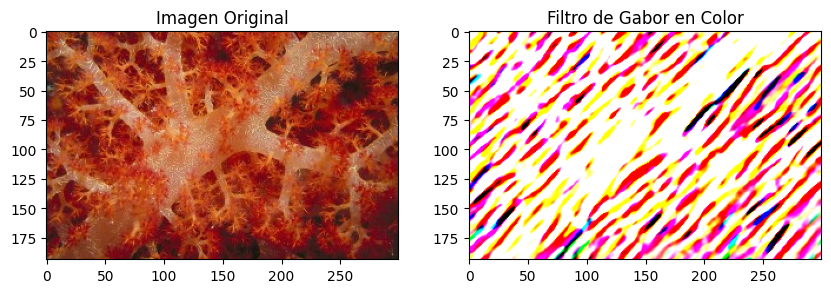

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en color
img = cv2.imread('CORAL2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB

# Separar los canales de color
r, g, b = cv2.split(img)

# Crear un kernel de Gabor
ksize = 21  # Tamaño del kernel
sigma = 5.0  # Desviación estándar de la gaussiana
theta = np.pi / 4  # Orientación del filtro
lambd = 10.0  # Longitud de onda de la onda sinusoidal
gamma = 0.5  # Relación de aspecto espacial
phi = 0  # Fase de la onda sinusoidal

# Definir el kernel de Gabor
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)

# Aplicar filtro de Gabor en cada canal
gabor_r = cv2.filter2D(r, -1, gabor_kernel)
gabor_g = cv2.filter2D(g, -1, gabor_kernel)
gabor_b = cv2.filter2D(b, -1, gabor_kernel)

# Combinar los canales procesados
gabor_color = cv2.merge([gabor_r, gabor_g, gabor_b])

# Mostrar imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Imagen Original")
plt.subplot(1,2,2), plt.imshow(gabor_color, cmap='gray'), plt.title("Filtro de Gabor en Color")
plt.show()


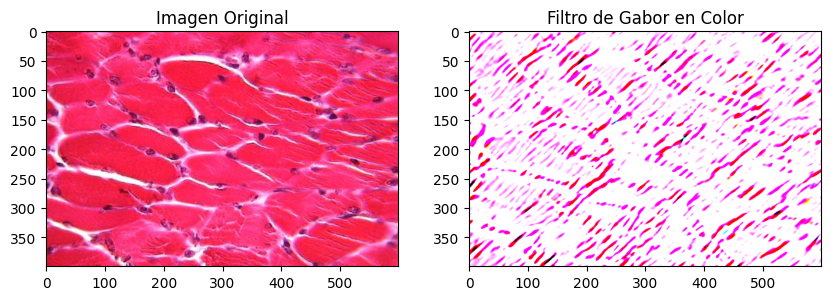

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en color
img = cv2.imread('TEJIDO.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB

# Separar los canales de color
r, g, b = cv2.split(img)

# Crear un kernel de Gabor
ksize = 21  # Tamaño del kernel
sigma = 5.0  # Desviación estándar de la gaussiana
theta = np.pi / 4  # Orientación del filtro
lambd = 10.0  # Longitud de onda de la onda sinusoidal
gamma = 0.5  # Relación de aspecto espacial
phi = 0  # Fase de la onda sinusoidal

# Definir el kernel de Gabor
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, phi, ktype=cv2.CV_32F)

# Aplicar filtro de Gabor en cada canal
gabor_r = cv2.filter2D(r, -1, gabor_kernel)
gabor_g = cv2.filter2D(g, -1, gabor_kernel)
gabor_b = cv2.filter2D(b, -1, gabor_kernel)

# Combinar los canales procesados
gabor_color = cv2.merge([gabor_r, gabor_g, gabor_b])

# Mostrar imágenes
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img), plt.title("Imagen Original")
plt.subplot(1,2,2), plt.imshow(gabor_color, cmap='gray'), plt.title("Filtro de Gabor en Color")
plt.show()

### SEGMENTACIÓN

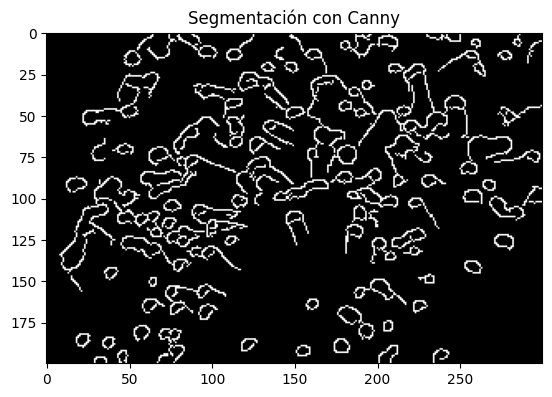

In [29]:
# Aplicar filtro bilateral antes de Canny para mejor segmentación
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
edges = cv2.Canny(bilateral, 50, 150)

plt.imshow(edges, cmap='gray'), plt.title("Segmentación con Canny")
plt.show()


### RESTAURACIÓN DE IMAGENES

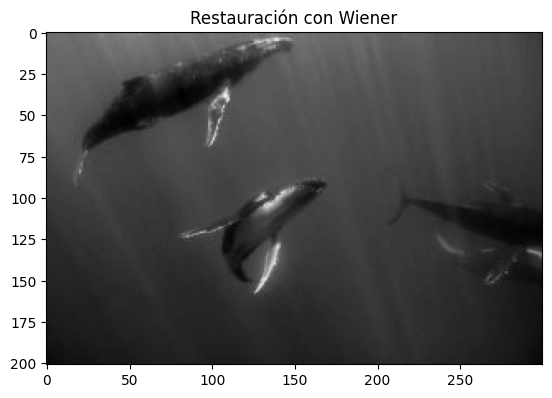

In [36]:
from scipy.signal import wiener
# Cargar imagen en escala de grises
img = cv2.imread('BALLENA.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro de Wiener para restaurar imagen borrosa
restored = wiener(img, (1,1))

plt.imshow(restored, cmap='gray'), plt.title("Restauración con Wiener")
plt.show()


### ECUALIZACIÓN

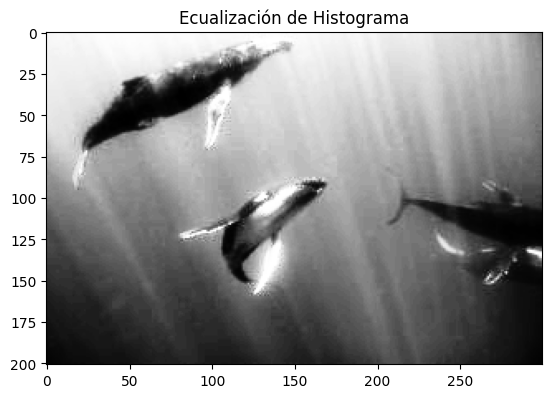

In [37]:
# Aplicar ecualización de histograma
equalized = cv2.equalizeHist(img)

plt.imshow(equalized, cmap='gray'), plt.title("Ecualización de Histograma")
plt.show()
